# Prosper Loan Data Analysis

## by Taif Alghamdi 


# Preliminary Wrangling

> ### Loan Data From Prosper 
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. (Last updated 03/11/2014)

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df=pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20



>### The dataset primarily overlook
>
>
>
> From the dataset dictionary, So far, I see that LoanStatus, BorrowerRate,, LoanOriginalAmount, StatedMonthlyIncome, Term, ListingCategory, MonthlyLoanPayment, TotalProsperLoans, TotalProsperPaymentsBilled, and Occupation are features of interest in this dataset.
>
> I'd like to see features that affect Loan completion rate, so I'll explore different features as BorrowerRate, Term, LoanOriginalAmount, MonthlyLoanPayment.

In [4]:
#drop columns with most null values and other unwanted columns
df.drop(['ListingKey','ListingNumber','ListingCreationDate','CreditGrade','ClosedDate','LenderYield','EstimatedEffectiveYield',
     'EstimatedLoss','EstimatedReturn','CurrentlyInGroup','GroupKey','DateCreditPulled','FirstRecordedCreditLine','LoanKey',
     'TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate',
     'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing',
     'LoanFirstDefaultedCycleNumber'],axis=1,inplace=True)

### Univariate Exploration


##### I'll  look at the distribution of the main variable of interest: BorrowerAPR.

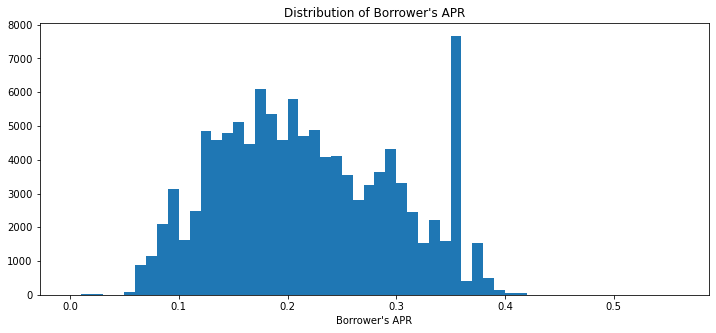

In [5]:
binsize = 0.05
bins = np.arange(0, df['BorrowerAPR'].max()+binsize, 0.01)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.title('Distribution of Borrower\'s APR')
plt.xlabel('Borrower\'s APR')
plt.show();

This distribution seems to have multiple peaks with a sharp peak between 0.35 and 0.36. There are not many loans with APR greater than 0.42.

In [6]:
#Analyzing rows that have a value of APR greater than 0.42
high_APR_Data = df[df['BorrowerAPR'] > 0.42]
high_APR_Data

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
18326,36,Defaulted,0.45857,0.4500,NaN,NaN,NaN,0,NaN,NaN,...,-6.62,0.00,2829.24,2829.24,0.0,1.0,0,0,0.0,21
22195,36,Chargedoff,0.46201,0.4500,NaN,NaN,NaN,0,NaN,NaN,...,-16.04,0.00,490.46,490.50,0.0,1.0,0,0,0.0,21
36018,36,Completed,0.51229,0.4975,NaN,NaN,NaN,0,NaN,NaN,...,-0.29,0.00,0.00,0.00,0.0,1.0,0,0,0.0,9
56761,36,Defaulted,0.50633,0.4975,NaN,NaN,NaN,0,NaN,NaN,...,-1.27,0.00,2964.88,2964.88,0.0,1.0,0,0,0.0,21
82043,36,Defaulted,0.48873,0.4800,NaN,NaN,NaN,0,NaN,NaN,...,-1.27,0.00,2963.64,2963.64,0.0,1.0,0,0,0.0,20
103973,36,Defaulted,0.45857,0.4500,NaN,NaN,NaN,0,NaN,NaN,...,-3.16,-3.75,2764.01,2764.01,0.0,1.0,0,0,0.0,22
105889,36,Chargedoff,0.42395,0.3600,1.0,HR,4.0,7,NH,Administrative Assistant,...,0.00,0.00,1000.00,1000.00,0.0,1.0,0,0,0.0,42


we see that for rows where borrower's APR was greater than 0.42 a lot of the information is missing such as IncomeRange. However, LoanOriginalAmount value is very small. This means the original loan amount value has an impact on the borrower's APR.

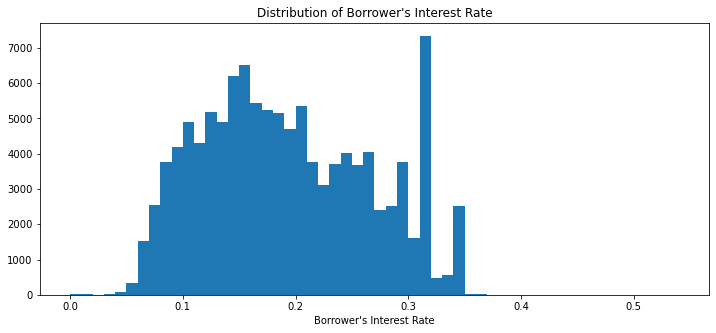

In [7]:
binsize = 0.05
bins = np.arange(0, df['BorrowerRate'].max()+binsize, 0.01)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.title('Distribution of Borrower\'s Interest Rate')
plt.xlabel('Borrower\'s Interest Rate')
plt.show();

The distribution for Borrower's interest rate is similar to that of Borrower's APR with a sharp peak between 0.31 and 0.32. This is a multi modal distribution.


##### i'll look at the 10 top number of listing in each Borrower States 


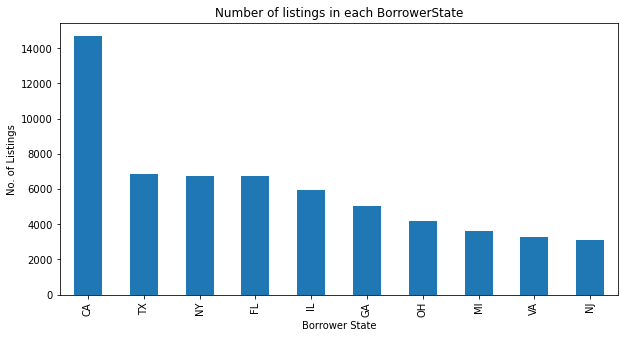

In [8]:
# find the top 10 states borrower
top10_states_borrower=df.BorrowerState.value_counts().head(10)

#create the bar chart
top10_states_borrower.plot.bar(stacked = True , figsize=(10, 5),title='Number of listings in each BorrowerState', grid=False)
                                
plt.xlabel('Borrower State');
plt.ylabel('No. of Listings');

As we can notice CA takes the first place in the borrower states by more than 14,000 listing, then TX , NY almost in the same positions , which match what mentioned about the population rank in the US.

##### number of listing under each Loan Status

In [9]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

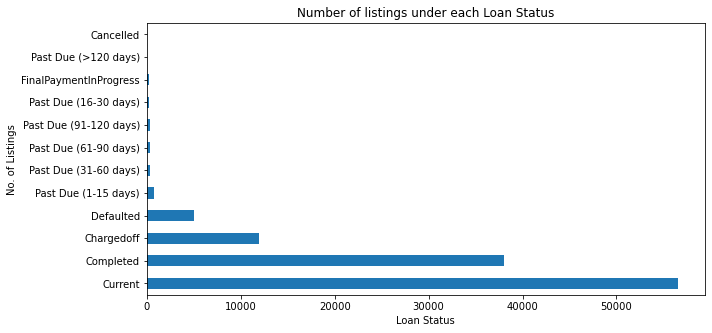

In [10]:
Loan_status=df.LoanStatus.value_counts()

#create the bar chart
Loan_status.plot.barh(stacked = True , figsize=(10, 5),#ordered = True, categories = order_loan,
                      title='Number of listings under each Loan Status', grid=False)
                                
plt.xlabel('Loan Status');
plt.ylabel('No. of Listings');

as we can see the current listing is past 50 thousend  

### Bivariate Exploration

Text(0.5, 1.0, 'BorrowerRate vs ProsperRating(Alpha)')

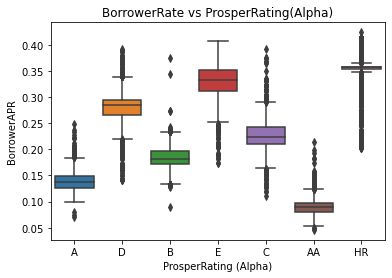

In [11]:
 #boxplot for BorrowerRate vs ProsperRating(Alpha)
sb.boxplot(data=df,x='ProsperRating (Alpha)',y='BorrowerAPR')
plt.title("BorrowerRate vs ProsperRating(Alpha)")

In [12]:
#statistical distribution for prosperrating(alpha)
df.groupby(['ProsperRating (Alpha)'])['BorrowerAPR'].describe()

,count,mean,std,min,25%,50%,75%,max
ProsperRating (Alpha),,,,,,,,
A,14551.0,0.138909,0.016361,0.07045,0.12626,0.13799,0.14965,0.24807
AA,5372.0,0.090041,0.016905,0.04583,0.07922,0.09000,0.09736,0.21368
B,15581.0,0.184030,0.018343,0.08999,0.17151,0.18173,0.19645,0.37453
C,18345.0,0.226124,0.023306,0.11155,0.21025,0.22362,0.24246,0.39153
D,14274.0,0.280581,0.024580,0.14061,0.26528,0.28488,0.29510,0.39153
E,9795.0,0.330551,0.024768,0.17426,0.31159,0.33215,0.35132,0.40679
HR,6935.0,0.356061,0.019608,0.20260,0.35356,0.35797,0.35797,0.42395


#### For prosper rating
1. "A" ,the mean is normally distributed.
2. "D" , the mean is left skewed,most of the values fall in the lower range of APR.
3. "B", the mean is right skewed,most of the values are tightly packed on the upper range of APR.there are more outliers also.
4. "E", the mean is normally distributed.
5. "C", the mean is right skewed.
6. "AA",the mean is very slightly skewed to left.
7. "HR",the Q1,Q2,Q3 are all same.
so BorrowerAPR is not much affected by ProsperRating.

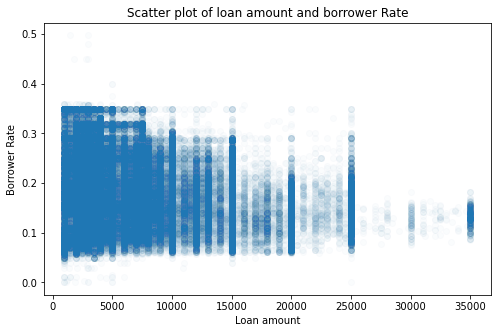

In [13]:
# plot the scatter of APR and loan amount
plt.figure(figsize = [8,5])
plt.scatter(data = df, x = 'LoanOriginalAmount' , y = 'BorrowerRate',alpha = 1/50)
plt.xlabel('Loan amount')
plt.ylabel('Borrower Rate')
plt.title('Scatter plot of loan amount and borrower Rate')
plt.show()


Points are concentrated at the left side of loan amount(x axis) and also concentrated at points those are multiples of 500, especially multiples of 5000. I also can see, the larger the amount, the less volatility of APR distributed, just as analyzed before.

#### Are the borrowers home owners? Home Ownership vs loan status category.


In [14]:
# Classified homeownership based on loan status ctegories
homeowner_loan = df.groupby(['LoanStatus', 'IsBorrowerHomeowner'])['LoanStatus'].count().unstack('IsBorrowerHomeowner')
homeowner_loan.apply(lambda row: row / row.sum(), axis = 1)

IsBorrowerHomeowner,False,True
LoanStatus,,
Cancelled,0.600000,0.400000
Chargedoff,0.555454,0.444546
Completed,0.519882,0.480118
Current,0.461291,0.538709
Defaulted,0.546831,0.453169
FinalPaymentInProgress,0.463415,0.536585
Past Due (1-15 days),0.532258,0.467742
Past Due (16-30 days),0.516981,0.483019
Past Due (31-60 days),0.493113,0.506887


Text(0.5, 0, 'homeowner')

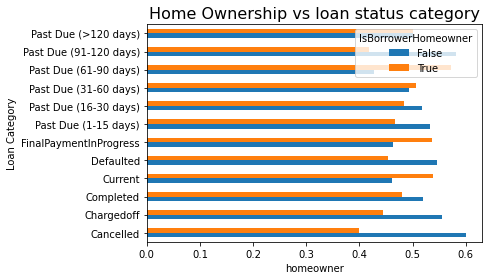

In [15]:
#Create bar chart to show the percentage

homeowner_loan.apply(lambda row: row / row.sum(), axis = 1).plot(kind='barh')

plt.title('Home Ownership vs loan status category',fontsize=16)
plt.ylabel("Loan Category")
plt.xlabel("homeowner")

In [16]:
# Create a copy of the dataset that include only the completed loans,so we can
#count the homeowner who have loan.
df2= df.copy()
df2.head(2)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,36,Completed,0.16516,0.158,NaN,NaN,NaN,0,CO,Other,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,36,Current,0.12016,0.092,6.0,A,7.0,2,CO,Professional,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [17]:
df2 =df2[df2['LoanStatus']!='Current']
df2["LoanStatus"]=(df2['LoanStatus']=='Completed').astype(int)

Text(0.5, 1.0, 'Is the borrowers home owners?')

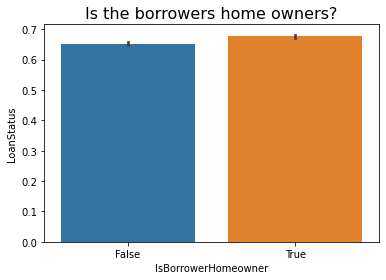

In [18]:
#create bar plot to see the result
sb.barplot(data= df2 ,x='IsBorrowerHomeowner', y='LoanStatus' )
plt.title('Is the borrowers home owners?' , fontsize=16)


Most of the borrower are homeowner , eventhough the diffrence between home\non-home owner are small percentage

### Multivariate Exploration


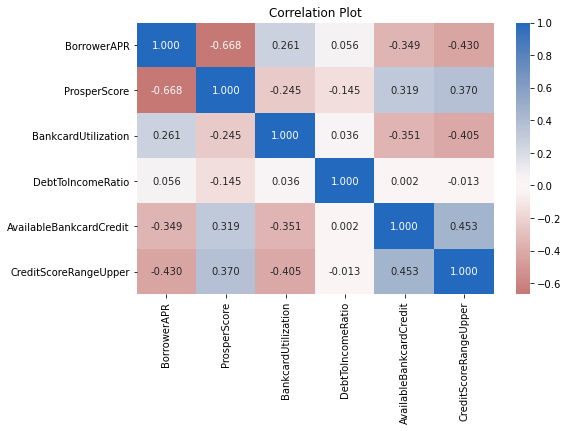

In [19]:
# correlation plot 

num_vars = ['BorrowerAPR', 'ProsperScore' ,'BankcardUtilization', 
            'DebtToIncomeRatio', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

plt.figure(figsize = [8, 5])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

Correlation Plot: There are no strong positive relationships between any pairs. It makes sense because higher AvailableBankcardCredit has better creditscore. BorrowerAPR and ProsperScore are negative because borrowers with lower score are more likely to pay higher APR. Similarly, higher CreditScore means the borrowers are more trustworthy, therefore it recevied lower APR.

##### Borrwer Income range in respect to Loan Amount vs Term


Text(0.5, 1.0, 'Comparison b\\w Loan Amount - Income range link to the Terms')

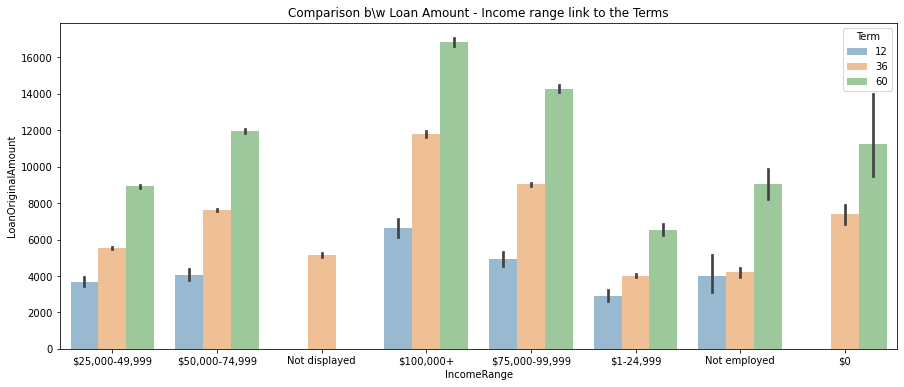

In [20]:
plt.figure(figsize=(15, 6))
sb.barplot(data = df , y = 'LoanOriginalAmount', x = 'IncomeRange', hue = "Term",alpha = 0.5)
plt.title('Comparison b\w Loan Amount - Income range link to the Terms')

Borrower with income + 100k are taken high amount of loans with laregest term 60 months. In general , 60 moths \ 5 years term is the most one taken in each Borrwer Income.

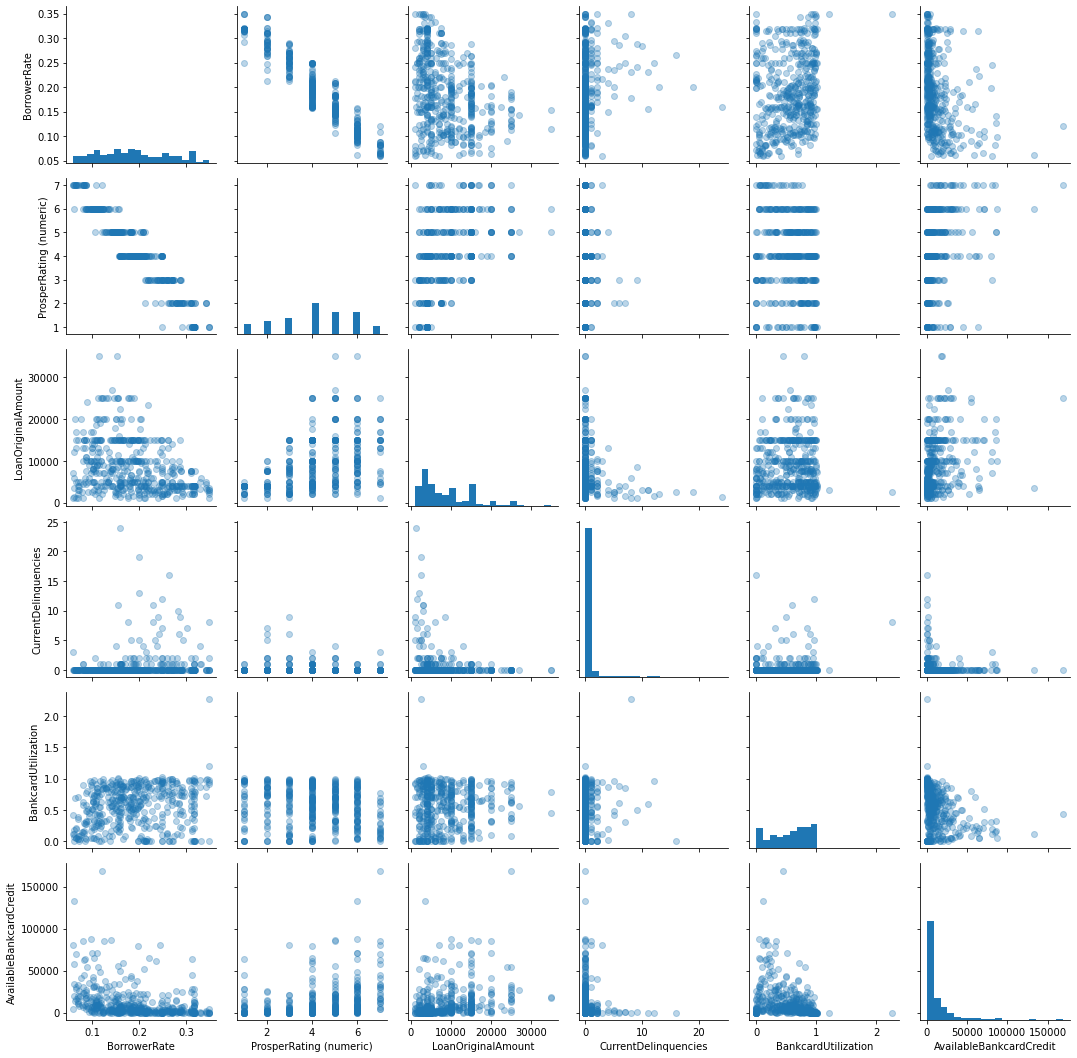

In [21]:
# choose a shorter list of numerical features.
numeric_vars_fewer = ['BorrowerRate','ProsperRating (numeric)','LoanOriginalAmount',
                      'CurrentDelinquencies','BankcardUtilization','AvailableBankcardCredit']

# plot matrix: sample 500 loans so that plots are clearer and they render faster
samples = df.sample(500,replace = False)

g = sb.PairGrid(data = samples, vars = numeric_vars_fewer )
g = g.map_diag(plt.hist, bins = 20,)
g.map_offdiag(plt.scatter, alpha=.3);

#### There are some interesting discoveries:

1. It shows again, BorrowerRate has a very strong correlation with ProsperRating.
2. When the loan amount increased, the BorrowerRate and BorrowerRate volatility both decreased.
3. ProsperScore and CreditScore against BorrowRate have the similar pattern.The scatter plot for credit score and Rate is opposite, rate volatility convergent when credit score decrised. The relationship of these three variables worth extra exploration.
4. Although the correlation coefficient of rate and current delinquencies is not high(-0.15), the scatter plot shows that, if the borrower has a higher current delinquencies, he/she the minimum BorrowerRate will increase.
5. BorrowerRate and bankcard utilization rate are roughly positive correlated. At the same time, BorrowerRate and available bankcredit are negative correlated.I will also look deep into them later.

Text(0.5, 1.0, 'BorrowerAPR vs Credit Score and ProsperScore')

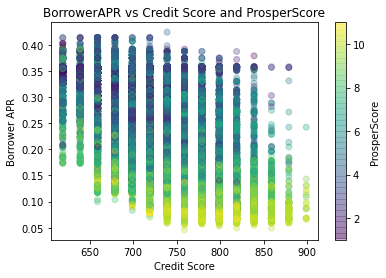

In [22]:
# plot between borrowerAPR,ProsperScore,Creditscore

plt.scatter(data=df,y='BorrowerAPR',x='CreditScoreRangeUpper',c='ProsperScore',alpha=.3)
plt.colorbar(label='ProsperScore')
plt.xlabel("Credit Score")
plt.ylabel("Borrower APR")
plt.title("BorrowerAPR vs Credit Score and ProsperScore")


Prosperscore and credit Score are positvely linear to each other while negatively linear to BorrowerAPR.Borrower with high credit score gets high prosperscore and so the low APR.

In [24]:
!jupyter nbconvert explorations_template.ipynb --to slides --post serve --template output_toggle

Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\site-packages\traitlets\traitlets.py", line 535, in get
    value = obj._trait_values[self.name]
KeyError: 'template_paths'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\lenovo\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\lenovo\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\lenovo\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 519, in convert_notebooks
    self.exporter = cls(config=s